<a href="https://colab.research.google.com/github/tanjascats/dissertation/blob/main/experiments_Adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import pandas as pd

In [3]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
# clean data
adult = adult.data.original.dropna()
adult = adult.drop(['fnlwgt','education'], axis=1)

In [5]:
adult.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# original
y = adult['income']
X = adult.drop('income', axis=1)

In [7]:
# randomly fp data
fp_data_rand = pd.read_csv('adult_fp_random_100.csv')

In [8]:
# NN scheme no specified correlations
fp_data_blind = pd.read_csv('adult_fp_all_attr_100.csv')
fp_data_blind = fp_data_blind.drop(['Id'], axis=1)

In [9]:
# NN scheme correlation: marital-status vs relationship
fp_data_blind_corr_ms_rel = pd.read_csv('adult_fp_ms_rel_100.csv')
fp_data_blind_corr_ms_rel = fp_data_blind_corr_ms_rel.drop(['Id'], axis=1)
# for this dataset gamma=10, fp_len=32

In [10]:
# NN scheme correlation:
fp_data_blind_corr_acc_wc_en = pd.read_csv('adult_fp_acc_wc_en_100.csv')
fp_data_blind_corr_acc_wc_en = fp_data_blind_corr_acc_wc_en.drop(['Id'], axis=1)

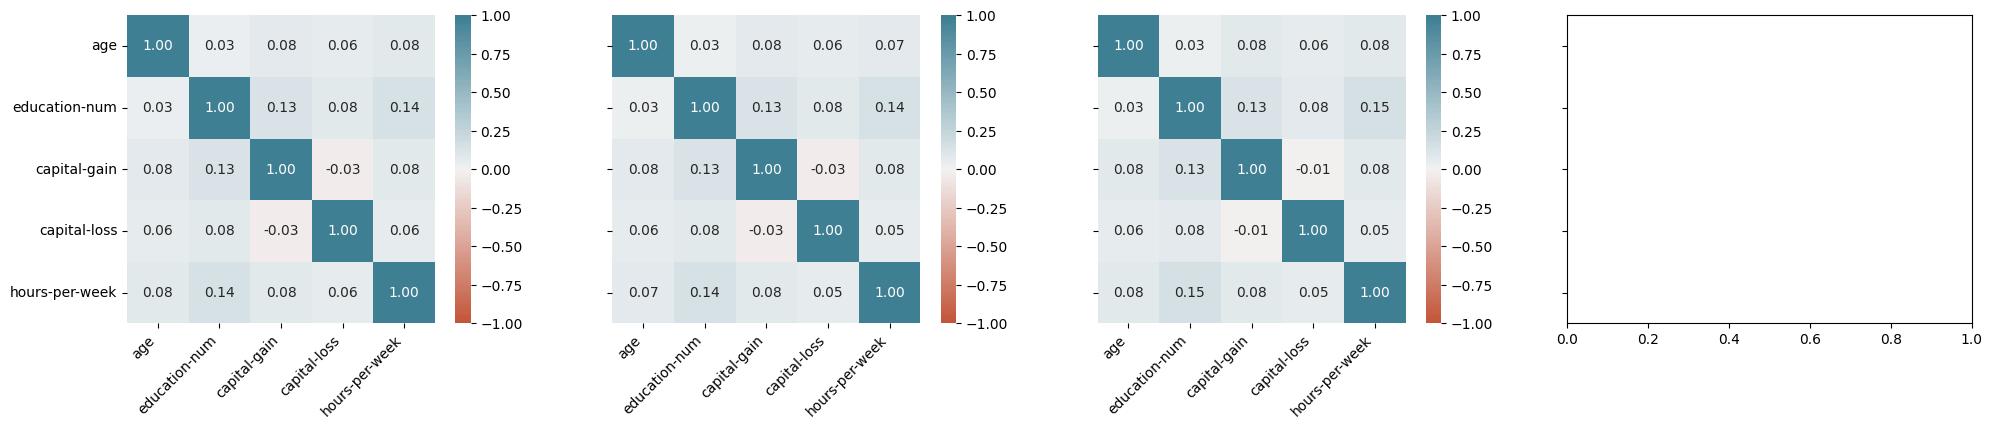

In [11]:
# correlation between ordinal variables in oridinal dataset: original -- random fingerprint -- knn fingerprint
fig, axs = plt.subplots(1, 4, figsize=(24,4), sharey='all')
axs = axs.flat

corr = X[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].corr()
sns.heatmap(corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f",
    ax = axs[0])
axs[0].set_xticklabels(
    axs[0].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# random
corr = fp_data_rand[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].corr()
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f",
    ax = axs[1]
)
axs[1].set_xticklabels(
    axs[1].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#axs[1].set_title('Random embedding')

# knn scheme
corr = fp_data_blind[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].corr()
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f",
    ax = axs[2]
)
axs[2].set_xticklabels(
    axs[2].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#axs[2].set_title('NN scheme w/o correlations')

# a bit useless because nothing is correlated from the numerical data -- so we dont procede with the last setting

[Text(0.5, 0, 'Husband'),
 Text(1.5, 0, 'Not-in-family'),
 Text(2.5, 0, 'Other-relative'),
 Text(3.5, 0, 'Own-child'),
 Text(4.5, 0, 'Unmarried'),
 Text(5.5, 0, 'Wife')]

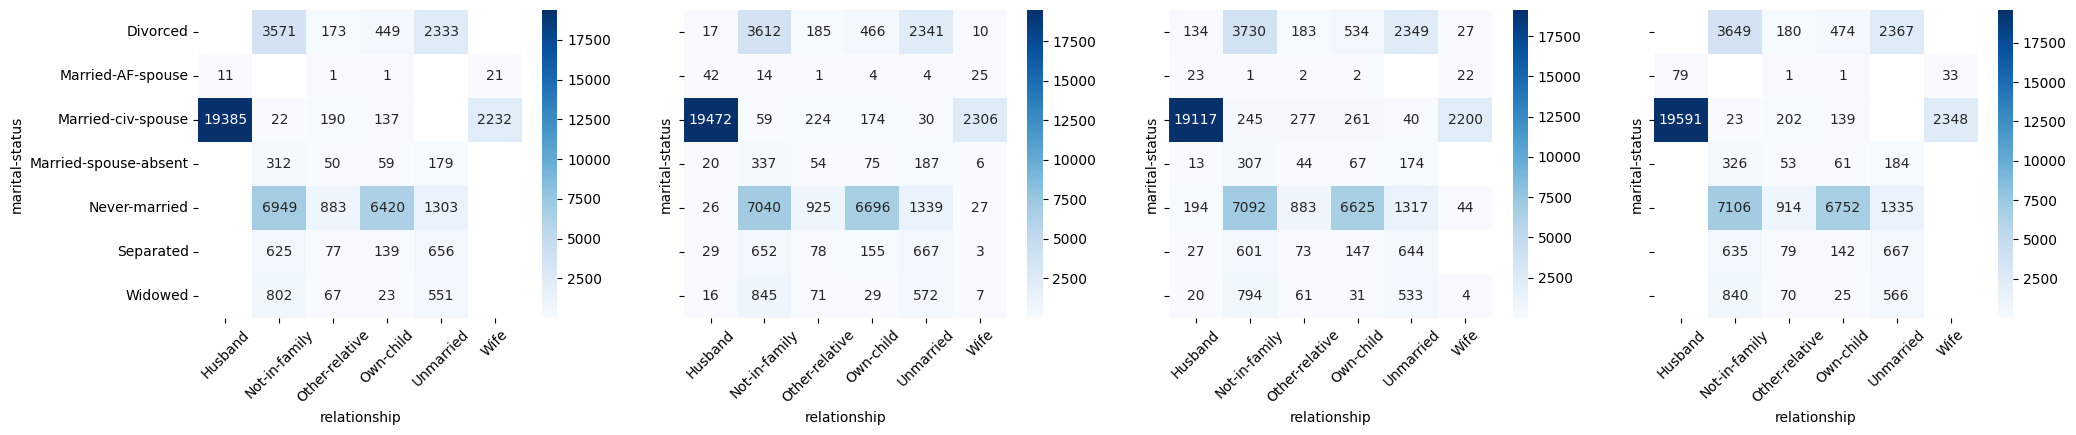

In [12]:
# pairwise histograms
# We investigate the pairwise attribute distributions of correlated attributes.
# E.g., relationship and marital status
fig, axs = plt.subplots(1, 4, figsize=(24,4), sharey='all')
axs = axs.flat
#fig.suptitle('Pairwise attribute distributions')

############
# ORIGINAL #
############
# marital-status vs relationship
df_2dhist = pd.DataFrame({
    x_label: grp['marital-status'].value_counts()
    for x_label, grp in X.groupby('relationship')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[0])
axs[0].set_xlabel('relationship')
axs[0].set_ylabel('marital-status')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
#axs[0].set_title('Original data')


# random embedding
df_2dhist = pd.DataFrame({
    x_label: grp['marital-status'].value_counts()
    for x_label, grp in fp_data_rand.groupby('relationship')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[1])
axs[1].set_xlabel('relationship')
axs[1].set_ylabel('marital-status')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
#axs[1].set_title('Random embedding')


# NN scheme without correlations
df_2dhist = pd.DataFrame({
    x_label: grp['marital-status'].value_counts()
    for x_label, grp in fp_data_blind.groupby('relationship')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[2])
axs[2].set_xlabel('relationship')
#axs[2].set_ylabel('marital-status')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45)
#axs[2].set_title('NN scheme w/o correlations')


# NN scheme with correlations
df_2dhist = pd.DataFrame({
    x_label: grp['marital-status'].value_counts()
    for x_label, grp in fp_data_blind_corr_ms_rel.groupby('relationship')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[3])
axs[3].set_xlabel('relationship')
axs[3].set_ylabel('marital-status')
axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=45)
#axs[3].set_title('NN scheme using correlations')

[Text(0.5, 0, '?'),
 Text(1.5, 0, 'Federal-gov'),
 Text(2.5, 0, 'Local-gov'),
 Text(3.5, 0, 'Never-worked'),
 Text(4.5, 0, 'Private'),
 Text(5.5, 0, 'Self-emp-inc'),
 Text(6.5, 0, 'Self-emp-not-inc'),
 Text(7.5, 0, 'State-gov'),
 Text(8.5, 0, 'Without-pay')]

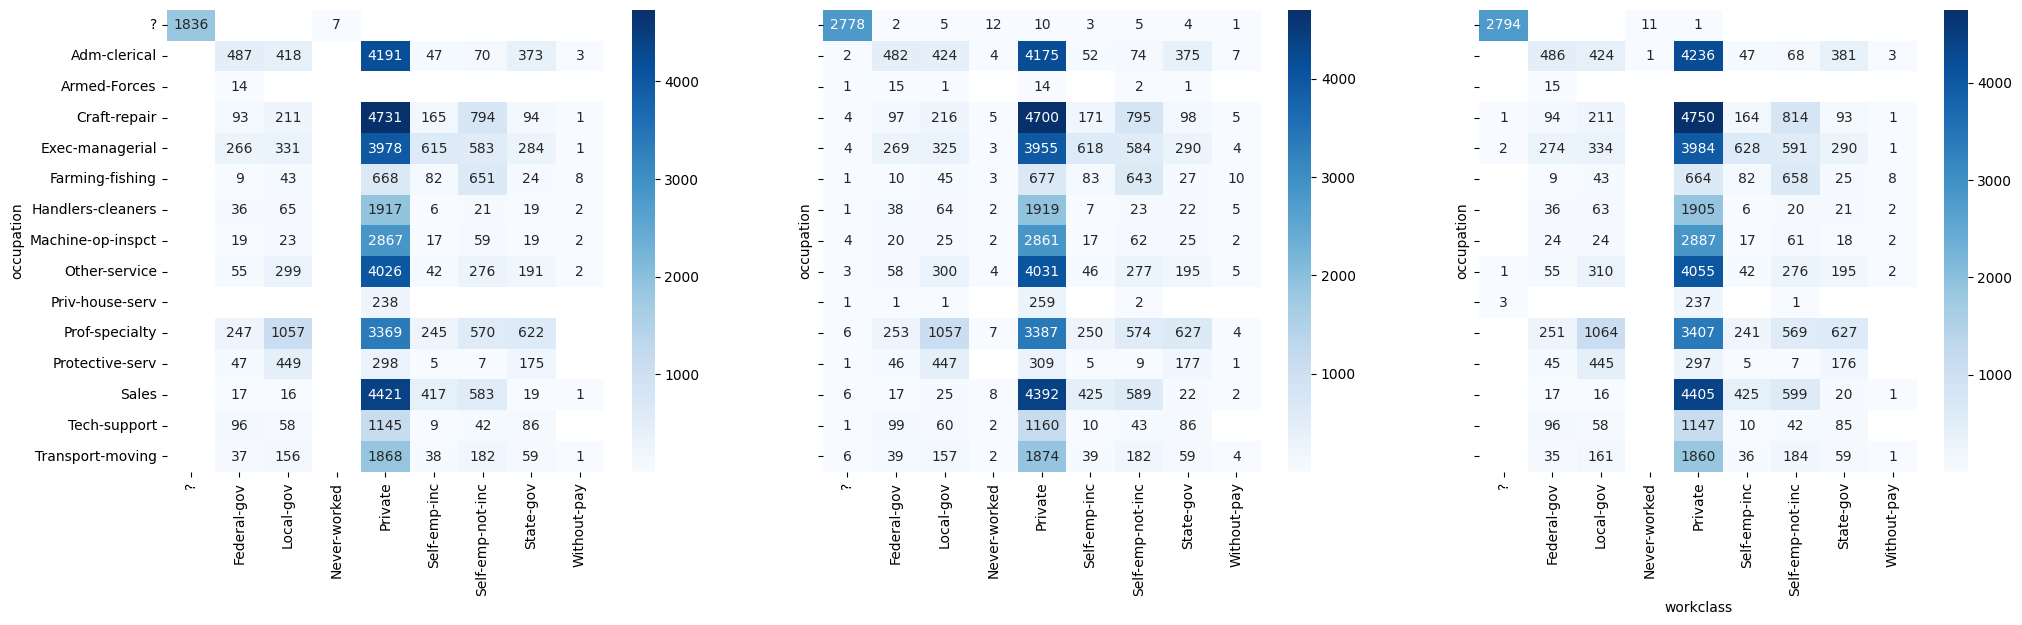

In [13]:
# pairwise histograms
# We investigate the pairwise attribute distributions of correlated attributes.
# E.g., relationship and marital status
fig, axs = plt.subplots(1, 3, figsize=(24,6), sharey='all', sharex='all')
axs = axs.flat
#fig.suptitle('Pairwise attribute distributions')

############
# ORIGINAL #
############
# occupation vs workclass
df_2dhist = pd.DataFrame({
    x_label: grp['occupation'].value_counts()
    for x_label, grp in X.groupby('workclass')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[0])
#axs[0].set_xlabel('workclass')
axs[0].set_ylabel('occupation')
#axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
#axs[0].set_title('Original data')


# random embedding
df_2dhist = pd.DataFrame({
    x_label: grp['occupation'].value_counts()
    for x_label, grp in fp_data_rand.groupby('workclass')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[1])
#axs[1].set_xlabel('workclass')
axs[1].set_ylabel('occupation')
#axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
#axs[1].set_title('Random embedding')


# # NN scheme without correlations --> can be removed for brevity
# df_2dhist = pd.DataFrame({
#     x_label: grp['occupation'].value_counts()
#     for x_label, grp in fp_data_blind.groupby('workclass')
# })
# sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[2])
# axs[2].set_xlabel('workclass')
# #axs[2].set_ylabel('marital-status')
# axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)
# #axs[2].set_title('NN scheme w/o correlations')


# NN scheme with correlations
df_2dhist = pd.DataFrame({
    x_label: grp['occupation'].value_counts()
    for x_label, grp in fp_data_blind_corr_acc_wc_en.groupby('workclass')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[2])
axs[2].set_xlabel('workclass')
axs[2].set_ylabel('occupation')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)
#axs[3].set_title('NN scheme using correlations')

In [14]:
# reduce the attribute domain
X_temp=X[(X['education-num'] == 1) | (X['education-num'] == 2) |
         (X['education-num'] == 11) | (X['education-num'] == 12) | (X['education-num'] == 13) |
         (X['education-num'] == 14) | (X['education-num'] == 15) | (X['education-num'] == 16)]

fp_data_rand_temp =fp_data_rand[(fp_data_rand['education-num'] == 1) | (fp_data_rand['education-num'] == 2) |
         (fp_data_rand['education-num'] == 11) | (fp_data_rand['education-num'] == 12) | (fp_data_rand['education-num'] == 13) |
         (fp_data_rand['education-num'] == 14) | (fp_data_rand['education-num'] == 15) | (fp_data_rand['education-num'] == 16)]

# fp_data_blind_temp =fp_data_blind[(fp_data_blind['education-num'] == 1) | (fp_data_blind['education-num'] == 2) |
#          (fp_data_blind['education-num'] == 9) | (fp_data_blind['education-num'] == 10) | (fp_data_blind['education-num'] == 11) |
#          (fp_data_blind['education-num'] == 15) | (fp_data_blind['education-num'] == 16)]

fp_data_blind_corr_acc_wc_en_temp = fp_data_blind_corr_acc_wc_en[(fp_data_blind_corr_acc_wc_en['education-num'] == 1) | (fp_data_blind_corr_acc_wc_en['education-num'] == 2) |
         (fp_data_blind_corr_acc_wc_en['education-num'] == 11) | (fp_data_blind_corr_acc_wc_en['education-num'] == 12) | (fp_data_blind_corr_acc_wc_en['education-num'] == 13) |
         (fp_data_blind_corr_acc_wc_en['education-num'] == 14) | (fp_data_blind_corr_acc_wc_en['education-num'] == 15) | (fp_data_blind_corr_acc_wc_en['education-num'] == 16)]

[Text(0.5, 0, '1'),
 Text(1.5, 0, '2'),
 Text(2.5, 0, '11'),
 Text(3.5, 0, '12'),
 Text(4.5, 0, '13'),
 Text(5.5, 0, '14'),
 Text(6.5, 0, '15'),
 Text(7.5, 0, '16')]

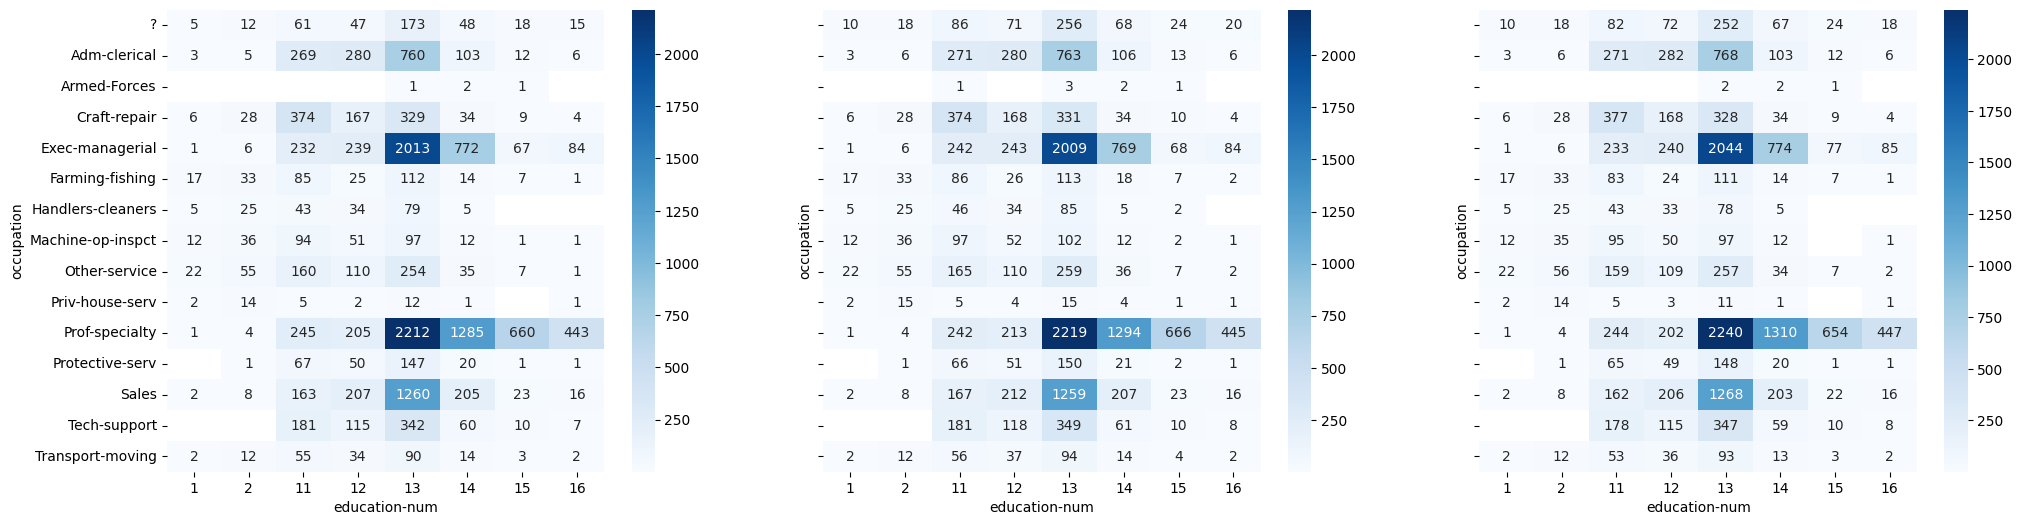

In [15]:
# pairwise histograms
# We investigate the pairwise attribute distributions of correlated attributes.
# E.g., relationship and marital status
fig, axs = plt.subplots(1, 3, figsize=(24,6), sharey='all')
axs = axs.flat
#fig.suptitle('Pairwise attribute distributions')

############
# ORIGINAL #
############
# occupation vs education-num
df_2dhist = pd.DataFrame({
    x_label: grp['occupation'].value_counts()
    for x_label, grp in X_temp.groupby('education-num')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[0])
axs[0].set_xlabel('education-num')
axs[0].set_ylabel('occupation')
axs[0].set_xticklabels(axs[0].get_xticklabels())
#axs[0].set_title('Original data')


# random embedding
df_2dhist = pd.DataFrame({
    x_label: grp['occupation'].value_counts()
    for x_label, grp in fp_data_rand_temp.groupby('education-num')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[1])
axs[1].set_xlabel('education-num')
axs[1].set_ylabel('occupation')
axs[1].set_xticklabels(axs[1].get_xticklabels())
#axs[1].set_title('Random embedding')


# NN scheme without correlations --> can be removed for brevity
# df_2dhist = pd.DataFrame({
#     x_label: grp['occupation'].value_counts()
#     for x_label, grp in fp_data_blind.groupby('education-num')
# })
# sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[2])
# axs[2].set_xlabel('education-num')
# #axs[2].set_ylabel('occupation')
# axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45)
# #axs[2].set_title('NN scheme w/o correlations')


# NN scheme with correlations
df_2dhist = pd.DataFrame({
    x_label: grp['occupation'].value_counts()
    for x_label, grp in fp_data_blind_corr_acc_wc_en_temp.groupby('education-num')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[2])
axs[2].set_xlabel('education-num')
axs[2].set_ylabel('occupation')
axs[2].set_xticklabels(axs[2].get_xticklabels())
#axs[3].set_title('NN scheme using correlations')

## Numerical attributes and their histograms

In [34]:
age_distinct = set(adult['age']); age_random_distinct = set(fp_data_rand['age']); age_NN_distinct= set(fp_data_blind_corr_acc_wc_en_temp['age'])
hpw_distinct = set(adult['hours-per-week']); hpw_random_distinct = set(fp_data_rand['hours-per-week']); hpw_NN_distinct = set(fp_data_blind_corr_acc_wc_en['hours-per-week'])

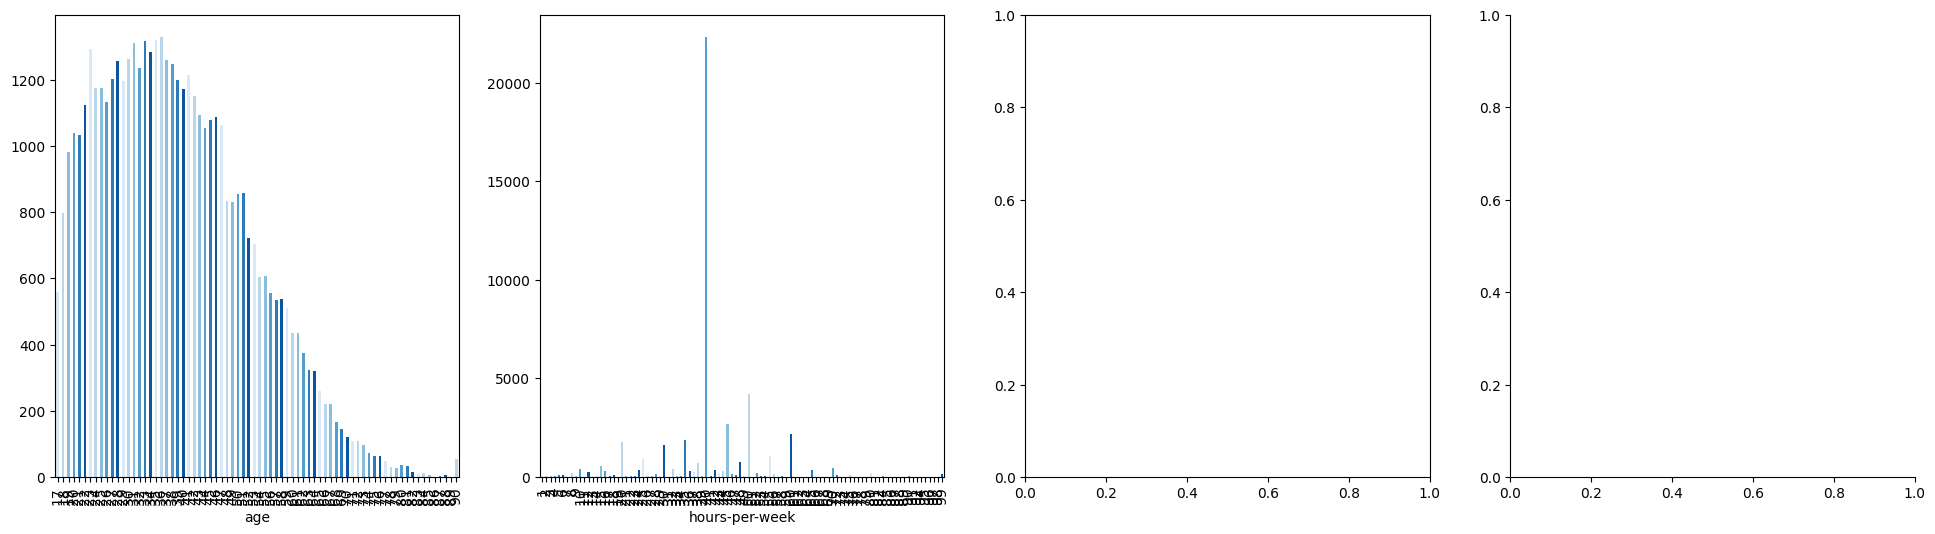

In [22]:
fig, axs = plt.subplots(1, 4, figsize=(24,6))
axs = axs.flat

adult.groupby('age').size().plot(kind='bar', color=sns.palettes.mpl_palette('Blues'), ax=axs[0])
plt.gca().spines[['top', 'right',]].set_visible(False)

adult.groupby('hours-per-week').size().plot(kind='bar', color=sns.palettes.mpl_palette('Blues'), ax=axs[1])
plt.gca().spines[['top', 'right',]].set_visible(False)


In [32]:
len(age_NN_distinct)

72

In [33]:
age_NN_distinct - age_distinct

set()

In [35]:
hpw_random_distinct - hpw_distinct

{0}